In [100]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [101]:
dataset = pd.read_csv('paul.csv')

In [102]:
dataset.shape

(18885, 7)

In [103]:
dataset.describe()

,District,Year,Season,Crop,Area,Production
count,18885.000000,18885.000000,18885.000000,18885.000000,18885.000000,1.887400e+04
mean,18.711835,2005.034101,2.144294,22.329574,6787.565210,1.941738e+04
std,10.952749,5.035933,1.254557,11.033601,19392.036919,1.365784e+05
min,0.000000,1997.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,9.000000,2001.000000,1.000000,16.000000,63.000000,7.100000e+01
50%,19.000000,2005.000000,2.000000,21.000000,405.000000,5.810000e+02
75%,28.000000,2009.000000,3.000000,30.000000,2642.000000,5.116750e+03
max,37.000000,2014.000000,5.000000,41.000000,212760.000000,9.614539e+06


In [104]:
dataset.isna()

,State,District,Year,Season,Crop,Area,Production
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [105]:
dataset.isna().sum()

State          0
District       0
Year           0
Season         0
Crop           0
Area           0
Production    11
dtype: int64

In [106]:
dataset.mean()

District         18.711835
Year           2005.034101
Season            2.144294
Crop             22.329574
Area           6787.565210
Production    19417.378227
dtype: float64

In [107]:
dataset.fillna(dataset.mean())
dataset=dataset.fillna(dataset.mean())

In [108]:
dataset.isnull().sum()

State         0
District      0
Year          0
Season        0
Crop          0
Area          0
Production    0
dtype: int64

In [109]:
dataset.shape

(18885, 7)

In [110]:
dataset.columns

Index(['State', 'District', 'Year', 'Season', 'Crop', 'Area', 'Production'], dtype='object')

In [111]:
X = dataset[[ 'District', 'Year', 'Season', 'Crop', 'Area']].values

In [112]:
y = dataset['Production'].values

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=99)

In [114]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
y_pred = regressor.predict(X_test)

In [116]:
pre=regressor.predict([[0,2010,1,30,1000]])
print(pre)


[2283.94782321]


In [117]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

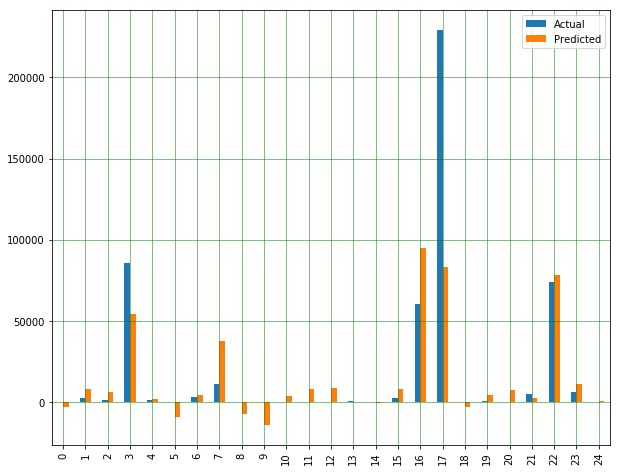

In [118]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [119]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11928.901959989082
Mean Squared Error: 580250569.7886325
Root Mean Squared Error: 24088.390767932848


In [120]:
accuracy=regressor.score(X_test,y_test)

In [121]:
print(accuracy*100,'%')

66.44863299735155 %
